<a href="https://colab.research.google.com/github/anvitakashikar/ML-Algorithms/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayes
* Naive Bayes is a Supervised Learning Algorithm, it is based on Bayes Theorem and is a probabilistic classifier.
* P(Class | Features) = ( P(Features | Class) × P(Class) ) / P(Features)
* Naive Bayes predicts the class with the highest posterior probability given the observed features (words in a message, for example).
* Problem Statement: Classify Emails as Spam or Not Spam

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv", sep='\t', header=None, names=['label', 'message'])
print(data.columns)

Index(['label', 'message'], dtype='object')


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


In [ ]:
print(data.isnull().sum())

label      0
message    0
dtype: int64


/tmp/ipython-input-7-918360703.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette='Set2')


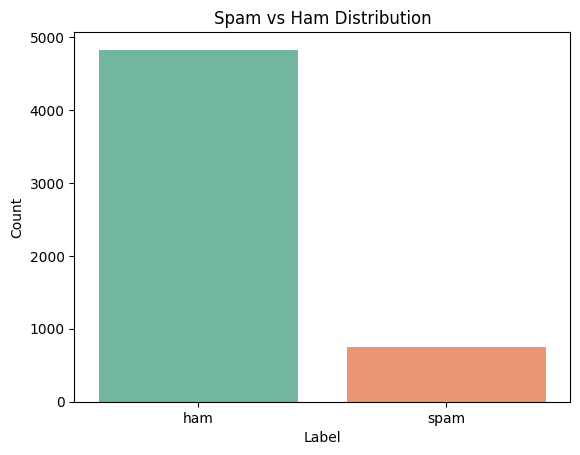

In [ ]:
sns.countplot(x='label', data=data, palette='Set2')
plt.title("Spam vs Ham Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

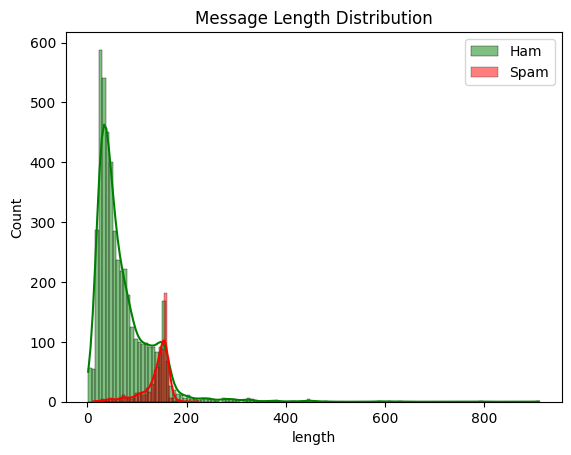

In [ ]:
data['length'] = data['message'].apply(len)
sns.histplot(data[data['label'] == 'ham']['length'], color='green', label='Ham', kde=True)
sns.histplot(data[data['label'] == 'spam']['length'], color='red', label='Spam', kde=True)
plt.title("Message Length Distribution")
plt.legend()
plt.show()

In [ ]:
data['label_num'] = data['label'].map({'ham': 0, 'spam': 1})
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['message'])
y = data['label_num']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred = nb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9829596412556054

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.92      0.96      0.94       149

    accuracy                           0.98      1115
   macro avg       0.96      0.97      0.96      1115
weighted avg       0.98      0.98      0.98      1115



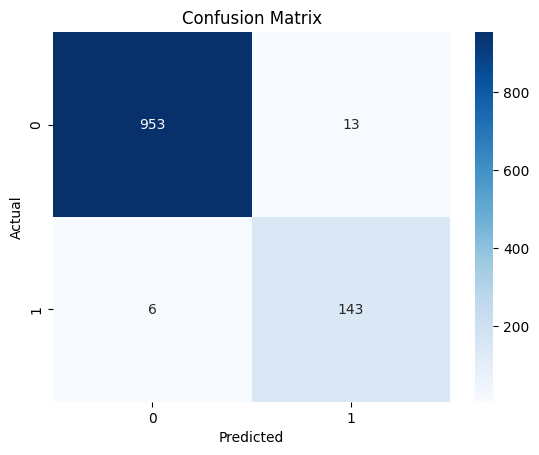

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()